# CE - 652
## Artificial Intelligence for Autonomous Driving
## Application Assigment 2
##### Week: 1

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import PIL
from PIL import Image

# 1.  PERCEPTRON:
This Perceptron has to be trained to learn the '& problem': 1 & 1 = 1,  1 & 0 = 0,  0 & 1 = 1,  0 & 0 = 1


## The first step is to define the hardlim function:

In [30]:
def hardlim(x):
    #Yor code here 
    return 1*(x >= 0)

## Next we have to define our matrix of patterns P:

In [31]:
P=np.array([[1, 3, 2, 1, 1.5,  3,  0.5, 1  , 2.1],
            [1, 1, 1, 3, -1.7, 0, -1.7, 2.2, 2.1],
            [1, 1, 4, 2, 1.8,  4,  0.3, 3.1, 2.1],
            [1, 1, 1, 1, 1,    1,  1,   1,   1 ]])

NOTICE that each pattern is represented as a column in P and although our patterns are bi-dimensional, each column has three components since the third component is just the input of the bias (always 1)

## Now let's define our traget matrix T:

In [32]:
T=np.array( [1, 0, 0, 0, 1, 0, 1, 0, 0 ] )

## Let's set our weights W randomly:


In [33]:
W= np.array([[0.041, -0.7, 0.5, 0.075],
            [0.041, -0.7, 0.5, 0.075],
            [0.041, -0.7, 0.5, 0.075],
            [0.041, -0.7, 0.5, 0.075],
            [0.041, -0.7, 0.5, 0.075],
            [0.041, -0.7, 0.5, 0.075]])

## Let's calculate the output of the net:

In [34]:
hardlim(np.dot(W,P[:,0]))

array([0, 0, 0, 0, 0, 0])

This is the output of my sigle neuron network for the first pattern P[:,0]. However, if we want to test the network with all the patterns at once, we can do it like this: 

In [35]:
hardlim(np.dot(W,P))

array([[0, 0, 1, 0, 1, 1, 1, 1, 0],
       [0, 0, 1, 0, 1, 1, 1, 1, 0],
       [0, 0, 1, 0, 1, 1, 1, 1, 0],
       [0, 0, 1, 0, 1, 1, 1, 1, 0],
       [0, 0, 1, 0, 1, 1, 1, 1, 0],
       [0, 0, 1, 0, 1, 1, 1, 1, 0]])

...and the error for all the patterns would be:

In [36]:
T-hardlim(np.dot(W,P))  

array([[ 1,  0, -1,  0,  0, -1,  0, -1,  0],
       [ 1,  0, -1,  0,  0, -1,  0, -1,  0],
       [ 1,  0, -1,  0,  0, -1,  0, -1,  0],
       [ 1,  0, -1,  0,  0, -1,  0, -1,  0],
       [ 1,  0, -1,  0,  0, -1,  0, -1,  0],
       [ 1,  0, -1,  0,  0, -1,  0, -1,  0]])

## Now let's plot the patterns (red class 0 and blue class 1), along with the decision line of my network as it this far (not trained):

[[ 0.041 -0.7    0.5    0.075]
 [ 0.041 -0.7    0.5    0.075]
 [ 0.041 -0.7    0.5    0.075]
 [ 0.041 -0.7    0.5    0.075]
 [ 0.041 -0.7    0.5    0.075]
 [ 0.041 -0.7    0.5    0.075]]


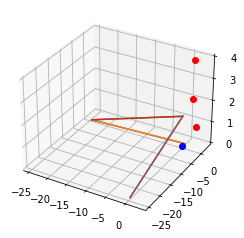

In [37]:
# Your code here to add the decision line to this plot
print(W)
plt.axes(projection ='3d')
p1_intercept = -(1/W[0][0])
p2_intercept = -(1/W[0][1])
p3_intercept = -(1/W[0][2])
x1 = [0 , p1_intercept]
y1 = [p2_intercept, 0]
plt.plot(x1, y1, [0,0])
p1_intercept = -(1/W[1][0])
p2_intercept = -(1/W[1][1])
p3_intercept = -(1/W[1][2])
x1 = [0 , p1_intercept]
y1 = [p2_intercept, 0]
plt.plot(x1, y1, [0,0])

p1_intercept = -(1/W[2][0])
p2_intercept = -(1/W[2][1])
p3_intercept = -(1/W[2][2])
x1 = [0 , p1_intercept]
z1 = [p2_intercept, 0]
plt.plot(x1, [0,0], z1)
p1_intercept = -(1/W[3][0])
p2_intercept = -(1/W[3][1])
p3_intercept = -(1/W[3][2])
x1 = [0 , p1_intercept]
z1 = [p2_intercept, 0]
plt.plot(x1, [0,0], z1)

p1_intercept = -(1/W[4][0])
p2_intercept = -(1/W[4][1])
p3_intercept = -(1/W[4][2])
y1 = [0 , p1_intercept]
z1 = [p2_intercept, 0]
plt.plot([0,0], y1, z1)
p1_intercept = -(1/W[5][0])
p2_intercept = -(1/W[5][1])
p3_intercept = -(1/W[5][2])
y1 = [0 , p1_intercept]
z1 = [p2_intercept, 0]
plt.plot([0,0], y1, z1)


#x2 = [0 , p1_intercept]
#z2 = [p3_intercept, 0]
#plt.plot(x2, [0,0], z2)
#y3 = [0 , p2_intercept]
#z3 = [p3_intercept, 0]
#plt.plot([0,0], y3, z3)
plt.plot([3,2,1],[1,1,3],[1,4,2],'ro') 
plt.plot([0],[0],[0],'bo') 
plt.show()

NOTICE that the network is not performing well (as the error shows) just because its desision line has not been adjusted yet (the weights are not fine-tuned). 

## Now, let's train the network (fine-tune its weights):

In [38]:
A=hardlim(np.dot(W,P))  
E=T-A
test = 1
while test!=0:
    test = 0
    print(E)
    length = len(P[0])
    for i in range(length):
        for j in range(6):
            W[j][0] = W[j][0] + (E[j][i] * P[0][i])
            W[j][1] = W[j][1] + (E[j][i] * P[1][i])
            W[j][2] = W[j][2] + (E[j][i] * P[2][i])
    A=hardlim(np.dot(W,P))
    E=T-A
    for k in range(length):
        for l in range(6):
            if E[l][k] == 1:
                test = 1


[[ 1  0 -1  0  0 -1  0 -1  0]
 [ 1  0 -1  0  0 -1  0 -1  0]
 [ 1  0 -1  0  0 -1  0 -1  0]
 [ 1  0 -1  0  0 -1  0 -1  0]
 [ 1  0 -1  0  0 -1  0 -1  0]
 [ 1  0 -1  0  0 -1  0 -1  0]]
[[1 0 0 0 1 0 1 0 0]
 [1 0 0 0 1 0 1 0 0]
 [1 0 0 0 1 0 1 0 0]
 [1 0 0 0 1 0 1 0 0]
 [1 0 0 0 1 0 1 0 0]
 [1 0 0 0 1 0 1 0 0]]
[[1 0 0 0 1 0 0 0 0]
 [1 0 0 0 1 0 0 0 0]
 [1 0 0 0 1 0 0 0 0]
 [1 0 0 0 1 0 0 0 0]
 [1 0 0 0 1 0 0 0 0]
 [1 0 0 0 1 0 0 0 0]]
[[1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0]]
[[1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0]]
[[ 1 -1  0  0  0 -1  0  0  0]
 [ 1 -1  0  0  0 -1  0  0  0]
 [ 1 -1  0  0  0 -1  0  0  0]
 [ 1 -1  0  0  0 -1  0  0  0]
 [ 1 -1  0  0  0 -1  0  0  0]
 [ 1 -1  0  0  0 -1  0  0  0]]
[[1 0 0 0 1 0 0 0 0]
 [1 0 0 0 1 0 0 0 0]
 [1 0 0 0 1 0 0 0 0]
 [1 0 0 0 1 0 0 0 0]
 [1 0 0 0 1 0 0 0 0]
 [1 0 0 0 1 0 0 0 0]]
[[1

## After training let's plot again to see how the decision line was ajusted (weights fine-tuned) so the network now solves the problem flawlessly:

[[ 1.541 -1.4   -0.1    0.075]
 [ 1.541 -1.4   -0.1    0.075]
 [ 1.541 -1.4   -0.1    0.075]
 [ 1.541 -1.4   -0.1    0.075]
 [ 1.541 -1.4   -0.1    0.075]
 [ 1.541 -1.4   -0.1    0.075]]


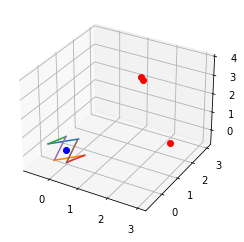

In [45]:
# Your code here to add the decision line to this plot
print(W)
plt.axes(projection ='3d')
p1_intercept = -(1/W[0][0])
p2_intercept = -(1/W[0][1])
p3_intercept = -(1/W[0][2])
x1 = [0 , p1_intercept]
y1 = [p2_intercept, 0]
plt.plot(x1, y1, [0,0])
p1_intercept = (1/W[1][0])
p2_intercept = (1/W[1][1])
p3_intercept = (1/W[1][2])
x1 = [0 , p1_intercept]
y1 = [p2_intercept, 0]
plt.plot(x1, y1, [0,0])

p1_intercept = -(1/W[2][0])
p2_intercept = -(1/W[2][1])
p3_intercept = -(1/W[2][2])
x1 = [0 , p1_intercept]
z1 = [p2_intercept, 0]
plt.plot(x1, [0,0], z1)
p1_intercept = (1/W[3][0])
p2_intercept = (1/W[3][1])
p3_intercept = (1/W[3][2])
x1 = [0 , p1_intercept]
z1 = [p2_intercept, 0]
plt.plot(x1, [0,0], z1)

p1_intercept = -(1/W[4][0])
p2_intercept = -(1/W[4][1])
p3_intercept = -(1/W[4][2])
y1 = [0 , p1_intercept]
z1 = [p2_intercept, 0]
plt.plot([0,0], y1, z1)
p1_intercept = (1/W[5][0])
p2_intercept = (1/W[5][1])
p3_intercept = (1/W[5][2])
y1 = [0 , p1_intercept]
z1 = [p2_intercept, 0]
plt.plot([0,0], y1, z1)
plt.plot([3,2,1],[1,1,3],[1,4,2],'ro') 
plt.plot([0],[0],[0],'bo') 
plt.show()